In [4]:
import pandas as pd

# Load the cleaned CSV file
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
housing_data.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,1,3,-0.377636,-0.659332,1,2,0.821321,0,-0.060888,0,3,3,0
1,-0.158157,1,3,0.479107,-0.833861,0,1,0.255968,1,1.727137,2,4,3,0
2,1.716595,1,3,0.764688,-1.396233,1,2,-1.048692,1,1.301417,2,4,3,0
3,0.724079,1,3,0.936037,-0.833861,1,2,0.516900,0,-0.912329,0,1,3,0
4,0.834359,0,3,0.364875,0.930822,0,2,-1.874977,0,0.705408,1,2,0,0


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter tuning with GridSearchCV
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [500, 1000]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [500, 1000]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [500, 1000]},
]

# Logistic Regression with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, scoring='f1', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Save the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save best hyperparameters to a file
import joblib
joblib.dump(best_model, 'best_logistic_regression_model.pkl')

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'elasticnet', 'solver': 'saga'}


Detailed Logistic Metrics:


,precision,recall,f1-score,support
0,0.826087,0.745098,0.783505,102.000000
1,0.769912,0.844660,0.805556,103.000000
accuracy,0.795122,0.795122,0.795122,0.795122
macro avg,0.797999,0.794879,0.794530,205.000000
weighted avg,0.797862,0.795122,0.794584,205.000000



Summary of Key Metrics:


,Metric,Score
0,Precision,0.769912
1,Recall,0.844660
2,F1 Score,0.805556
3,Accuracy,0.795122


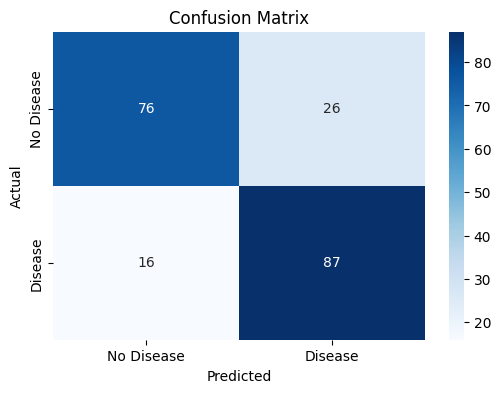

In [15]:
# Import necessary libraries
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the best model
best_model = joblib.load('best_logistic_regression_model.pkl')

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame(report_dict).transpose()

# Display detailed classification report as a table
from IPython.display import display
print("Detailed Logistic Metrics:")
display(metrics_df)

# Create a summary table for key metrics
summary_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score", "Accuracy"],
    "Score": [precision, recall, f1, accuracy]
})
print("\nSummary of Key Metrics:")
display(summary_metrics)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Random Forest Classifier with GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Save the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save best model to a file
joblib.dump(best_model, 'best_random_forest_model.pkl')

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Detailed Classification Metrics


,precision,recall,f1-score,support
0,0.971429,1.000000,0.985507,102.000000
1,1.000000,0.970874,0.985222,103.000000
accuracy,0.985366,0.985366,0.985366,0.985366
macro avg,0.985714,0.985437,0.985364,205.000000
weighted avg,0.985784,0.985366,0.985364,205.000000



Key Metrics Summary


,Metric,Score
0,Precision,1.000000
1,Recall,0.970874
2,F1 Score,0.985222
3,Accuracy,0.985366


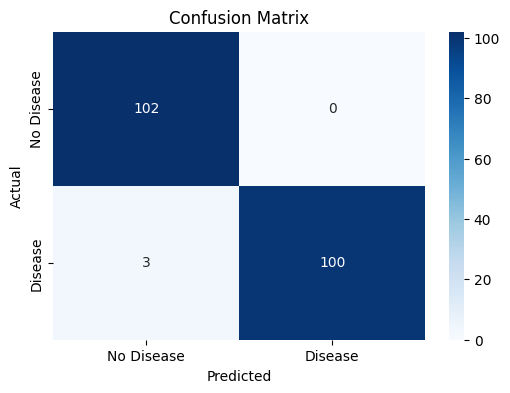

In [ ]:
# Import necessary libraries
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the best model
best_model = joblib.load('best_random_forest_model.pkl')

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Classification report as a DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Create a DataFrame for key metrics
metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1 Score", "Accuracy"],
    "Score": [precision, recall, f1, accuracy]
})

# Display classification report and key metrics as structured tables
print("Detailed Random Forest Classification Metrics")
display(report_df)

print("\nKey Metrics Summary")
display(metrics_df)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


,Metric,Logistic Regression,Random Forest
0,Precision,0.769912,1.000000
1,Recall,0.844660,0.970874
2,F1-Score,0.805556,0.985222
3,Accuracy,0.795122,0.985366


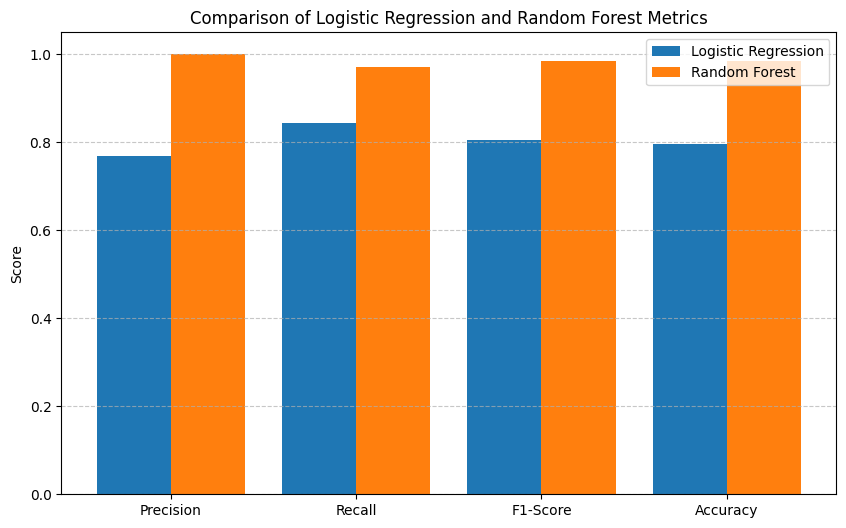

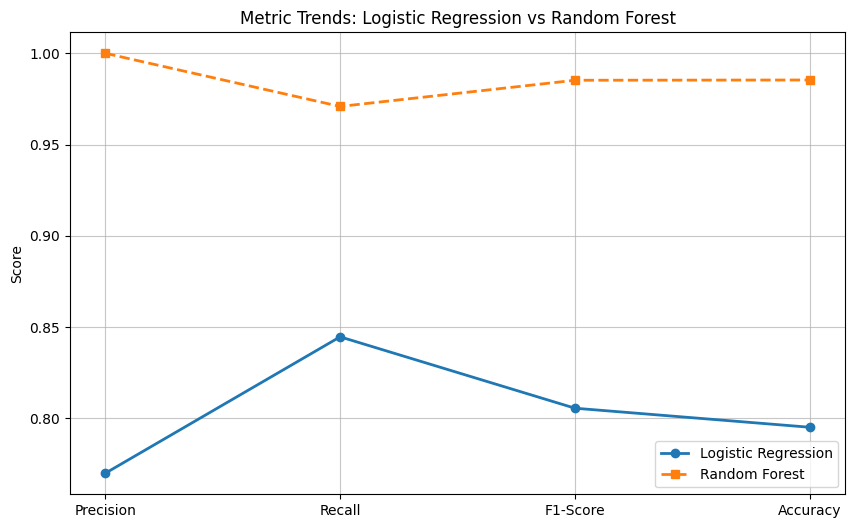

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/zhengyang/Inti/BCSCUN/Sem 7/Machine Learning/Clasification/cleaned_HeartDisease.csv'
data = pd.read_csv(file_path)

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the saved Logistic Regression and Random Forest models
logistic_model = joblib.load('best_logistic_regression_model.pkl')
random_forest_model = joblib.load('best_random_forest_model.pkl')

# Predict on test set using Logistic Regression
logistic_y_pred = logistic_model.predict(X_test)
logistic_metrics = {
    "Precision": precision_score(y_test, logistic_y_pred),
    "Recall": recall_score(y_test, logistic_y_pred),
    "F1-Score": f1_score(y_test, logistic_y_pred),
    "Accuracy": accuracy_score(y_test, logistic_y_pred)
}

# Predict on test set using Random Forest
random_forest_y_pred = random_forest_model.predict(X_test)
random_forest_metrics = {
    "Precision": precision_score(y_test, random_forest_y_pred),
    "Recall": recall_score(y_test, random_forest_y_pred),
    "F1-Score": f1_score(y_test, random_forest_y_pred),
    "Accuracy": accuracy_score(y_test, random_forest_y_pred)
}

# Combine results into a DataFrame
comparison_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "Accuracy"],
    "Logistic Regression": list(logistic_metrics.values()),
    "Random Forest": list(random_forest_metrics.values())
})

# Display the comparison DataFrame
from IPython.display import display
display(comparison_df)

# Bar plot for comparing metrics between Logistic Regression and Random Forest
metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]
logistic_values = list(logistic_metrics.values())
random_forest_values = list(random_forest_metrics.values())

x = range(len(metrics))  # Number of metrics

plt.figure(figsize=(10, 6))
plt.bar(x, logistic_values, width=0.4, label="Logistic Regression", align="center")
plt.bar([p + 0.4 for p in x], random_forest_values, width=0.4, label="Random Forest", align="center")
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel("Performance Score")
plt.title("Comparison of Logistic Regression and Random Forest Metrics")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line plot for trend comparison
plt.figure(figsize=(10, 6))
plt.plot(metrics, logistic_values, marker='o', label="Logistic Regression", linestyle='-', linewidth=2)
plt.plot(metrics, random_forest_values, marker='s', label="Random Forest", linestyle='--', linewidth=2)
plt.ylabel("Performance Score")
plt.title("Metric Trends: Logistic Regression vs Random Forest")
plt.legend()
plt.grid(alpha=0.7)
plt.show()
